In [132]:
import sys
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [4]:
print(sys.version)
plt.style.use("seaborn-dark")

3.7.0 (v3.7.0:1bf9cc5093, Jun 26 2018, 23:26:24) 
[Clang 6.0 (clang-600.0.57)]


In [23]:
df_wti_raw = pd.read_csv(
    "../data/fred/DCOILWTICO.csv",
    index_col=0,
    header=0,
    parse_dates=["DATE"],
    date_parser=lambda d: datetime.strptime(d, "%Y-%m-%d")
)
df_cpi_raw = pd.read_csv(
    "../data/fred/CPIAUCSL.csv",
    index_col=0,
    header=0,
    parse_dates=["DATE"],
    date_parser=lambda d: datetime.strptime(d, "%Y-%m-%d")
)

In [124]:
start = datetime(2000, 1, 1)
end = datetime(2019, 9, 30)
def select_range(df):
    return df[np.logical_and(
        df.index >= start, df.index <= end
    )]
df_wti, df_cpi = map(select_range, (df_wti_raw, df_cpi_raw))
df_wti = df_wti[df_wti.values != "."]
df_wti, df_cpi = map(lambda x: x.astype(np.float32), (df_wti, df_cpi))

In [125]:
print(df_wti.info())
print(df_wti.head())
print(df_wti.tail())
print(df_cpi.info())
print(df_cpi.head())
print(df_cpi.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4956 entries, 2000-01-04 to 2019-09-30
Data columns (total 1 columns):
DCOILWTICO    4956 non-null float32
dtypes: float32(1)
memory usage: 58.1 KB
None
            DCOILWTICO
DATE                  
2000-01-04   25.559999
2000-01-05   24.650000
2000-01-06   24.790001
2000-01-07   24.790001
2000-01-10   24.709999
            DCOILWTICO
DATE                  
2019-09-24   57.220001
2019-09-25   56.380001
2019-09-26   56.240002
2019-09-27   55.950001
2019-09-30   54.090000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 2000-01-01 to 2019-09-01
Data columns (total 1 columns):
CPIAUCSL    237 non-null float32
dtypes: float32(1)
memory usage: 2.8 KB
None
              CPIAUCSL
DATE                  
2000-01-01  169.300003
2000-02-01  170.000000
2000-03-01  171.000000
2000-04-01  170.899994
2000-05-01  171.199997
              CPIAUCSL
DATE                  
2019-05-01  255.154999
2019-06-01  255.304993
2019-07-01  256.16

In [163]:
# Normalizing using CPIAUCSL to construct real crude oil price.
# Creating CPI referencing series
df_norm_cpi = df_cpi / df_cpi.iloc[0, 0]  # 2000.01.01 as 1.00 index.
df_norm_cpi_daily = df_norm_cpi.resample("d", fill_method="ffill", label="left")
# fig = plt.figure(figsize=(15, 3), dpi=300)
# plt.scatter(df_norm_cpi.index, df_norm_cpi.values, label="monthly", alpha=0.7, s=1, color="red")
# plt.plot(df_norm_cpi_daily, label="daily", alpha=0.3)
# plt.legend()
# plt.show()
df_norm_cpi = df_norm_cpi_daily

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7184 entries, 2000-01-01 to 2019-09-01
Freq: D
Data columns (total 1 columns):
CPIAUCSL    7184 non-null float32
dtypes: float32(1)
memory usage: 84.2 KB


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  after removing the cwd from sys.path.


In [127]:
df_norm_cpi

,CPIAUCSL
DATE,
2000-01-01,1.000000
2000-01-02,1.000000
2000-01-03,1.000000
2000-01-04,1.000000
2000-01-05,1.000000
2000-01-06,1.000000
2000-01-07,1.000000
2000-01-08,1.000000
2000-01-09,1.000000


In [180]:
# Normalize operation, sequential implementation.
df_wti_real = pd.DataFrame(columns=["DCOILWTICO_REAL"], index=df_wti.index).astype(np.float32)
for t in df_wti_real.index:
    try:
        real_price = df_wti["DCOILWTICO"][t] / df_norm_cpi["CPIAUCSL"][t]
        df_wti_real["DCOILWTICO_REAL"][t] = real_price
    except KeyError:
        print(f"Skipped: {t}")

Skipped: 2019-09-03 00:00:00
Skipped: 2019-09-04 00:00:00
Skipped: 2019-09-05 00:00:00
Skipped: 2019-09-06 00:00:00
Skipped: 2019-09-09 00:00:00
Skipped: 2019-09-10 00:00:00
Skipped: 2019-09-11 00:00:00
Skipped: 2019-09-12 00:00:00
Skipped: 2019-09-13 00:00:00
Skipped: 2019-09-16 00:00:00
Skipped: 2019-09-17 00:00:00
Skipped: 2019-09-18 00:00:00
Skipped: 2019-09-19 00:00:00
Skipped: 2019-09-20 00:00:00
Skipped: 2019-09-23 00:00:00
Skipped: 2019-09-24 00:00:00
Skipped: 2019-09-25 00:00:00
Skipped: 2019-09-26 00:00:00
Skipped: 2019-09-27 00:00:00
Skipped: 2019-09-30 00:00:00


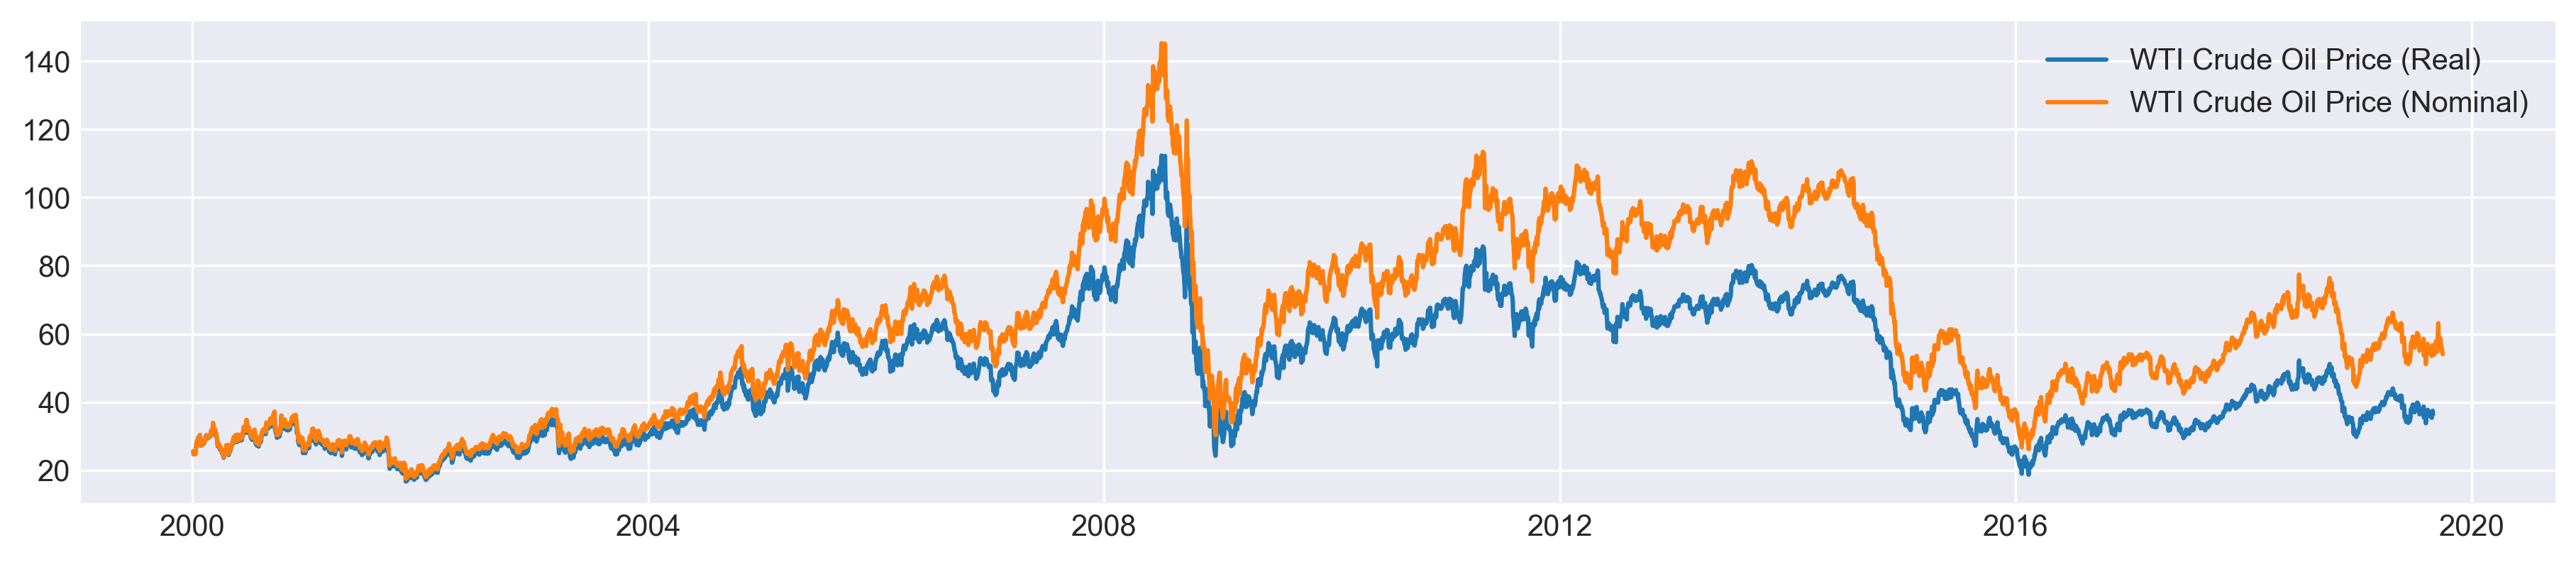

In [185]:
plt.rcParams["figure.figsize"] = (15, 3)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["axes.grid"] = True
plt.plot(df_wti_real, label="WTI Crude Oil Price (Real)")
plt.plot(df_wti, label="WTI Crude Oil Price (Nominal)")
plt.legend()
plt.show()

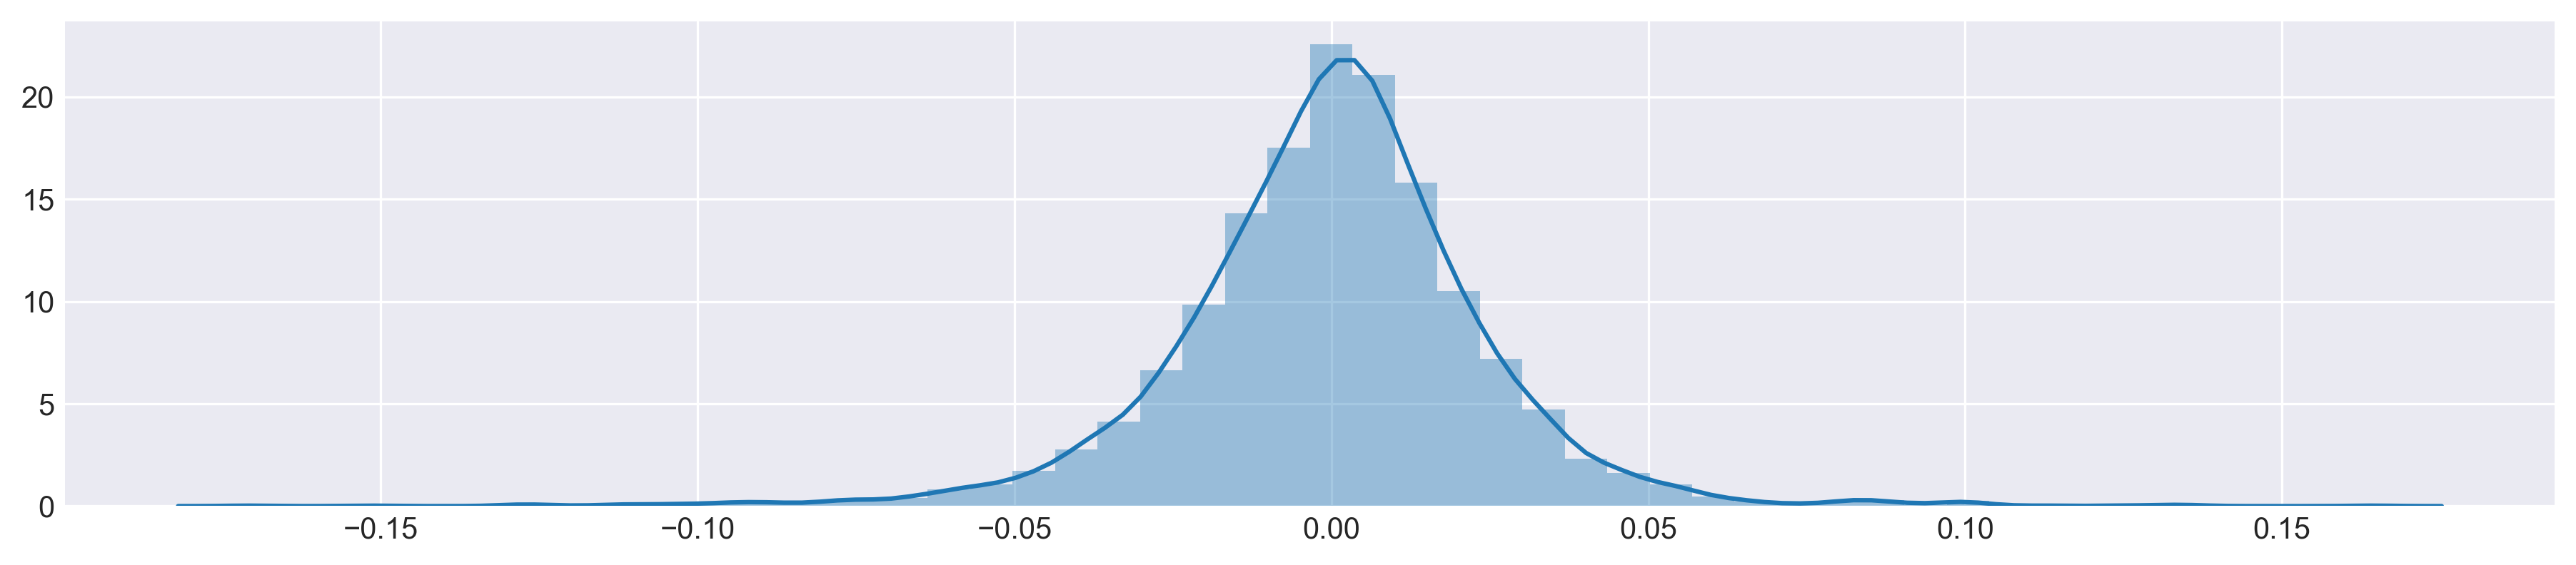

In [216]:
# Transform to log-difference (return)
def construct_return(raw_price: pd.DataFrame):
    log_price = np.log(raw_price).dropna()
    return log_price.diff().dropna()
df_wti_return = construct_return(df_wti_real)
sns.distplot(df_wti_return.values)

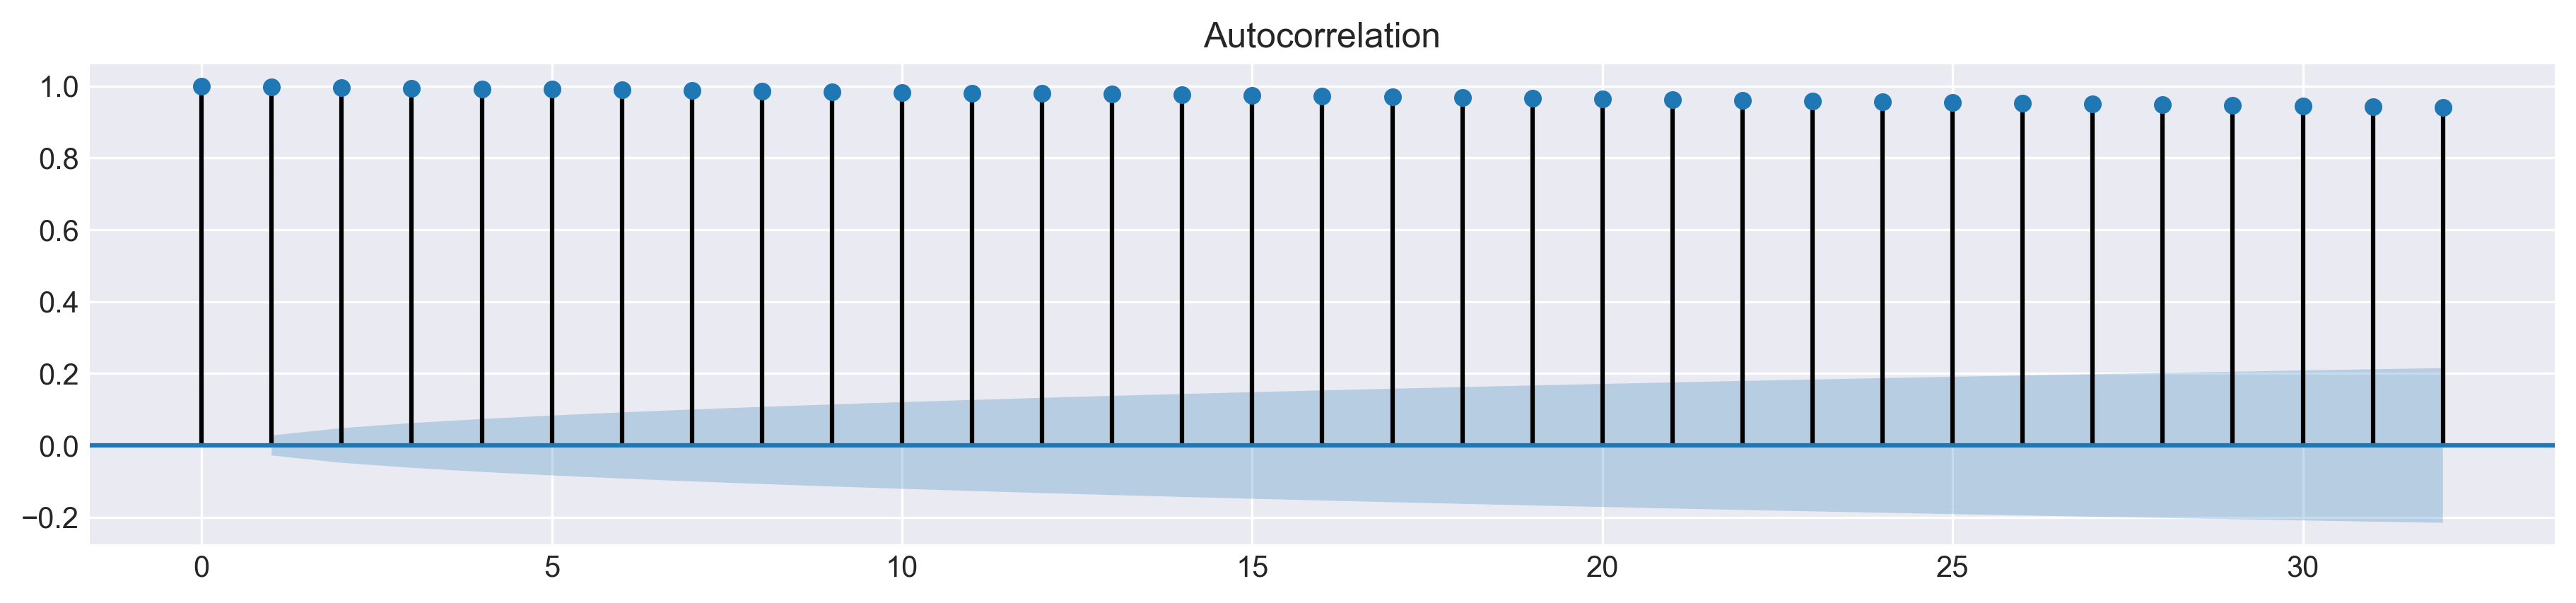

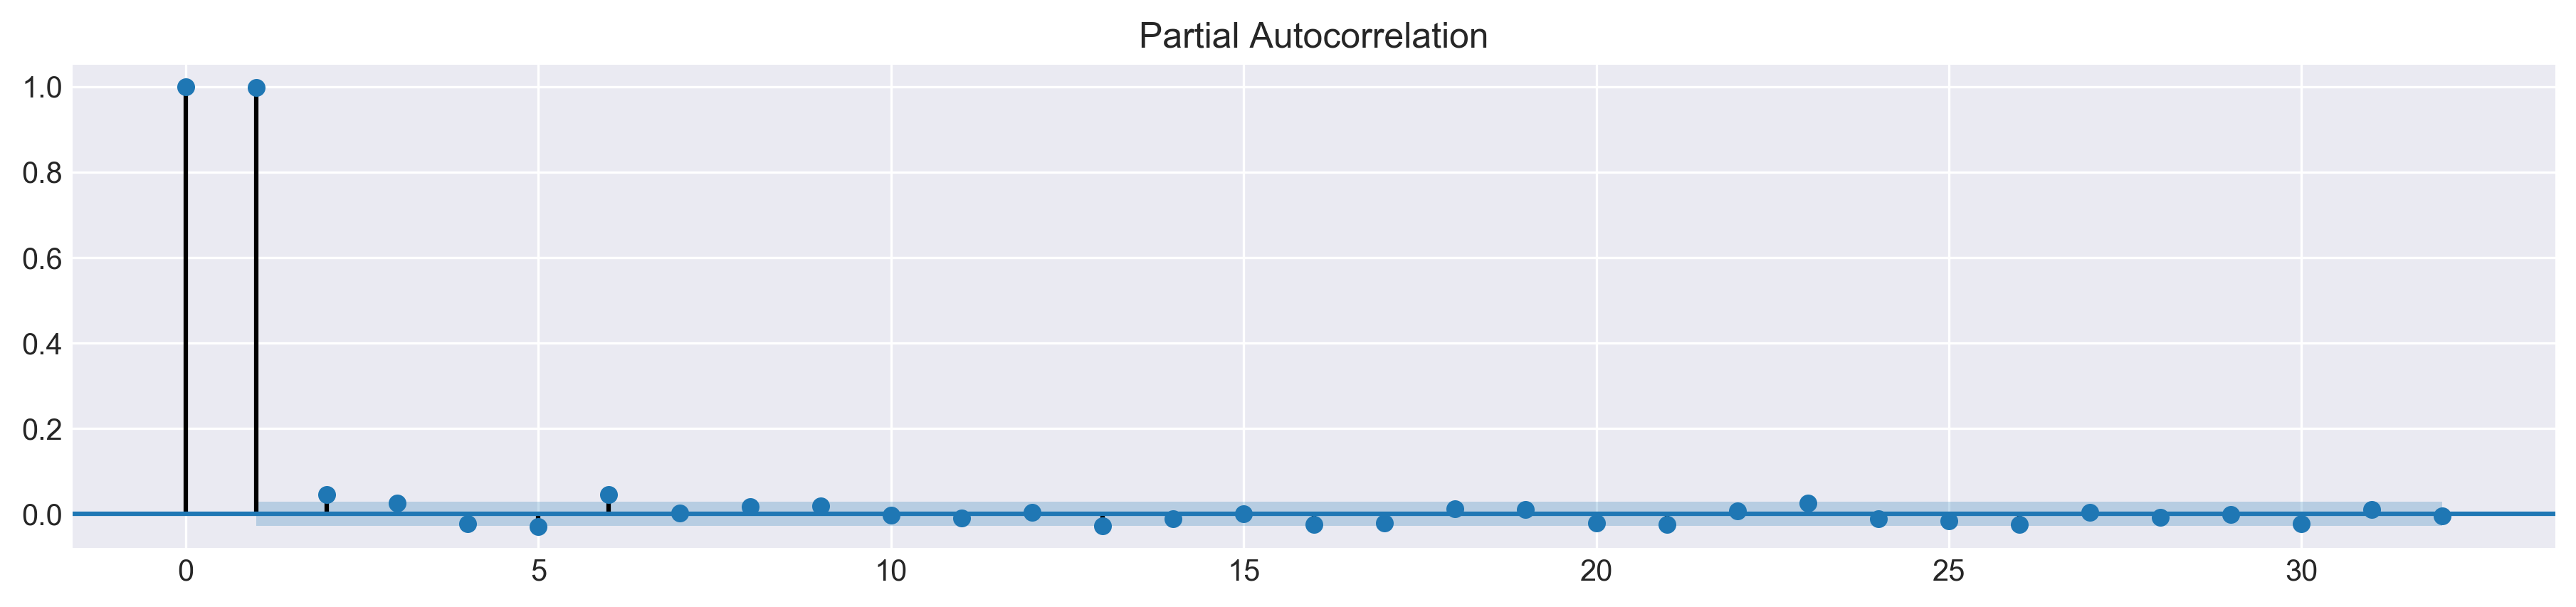

In [184]:
sm.tsa.graphics.plot_acf(df_wti_real.dropna().values, lags=32)
plt.show()
sm.tsa.graphics.plot_pacf(df_wti_real.dropna(), lags=32)
plt.show()

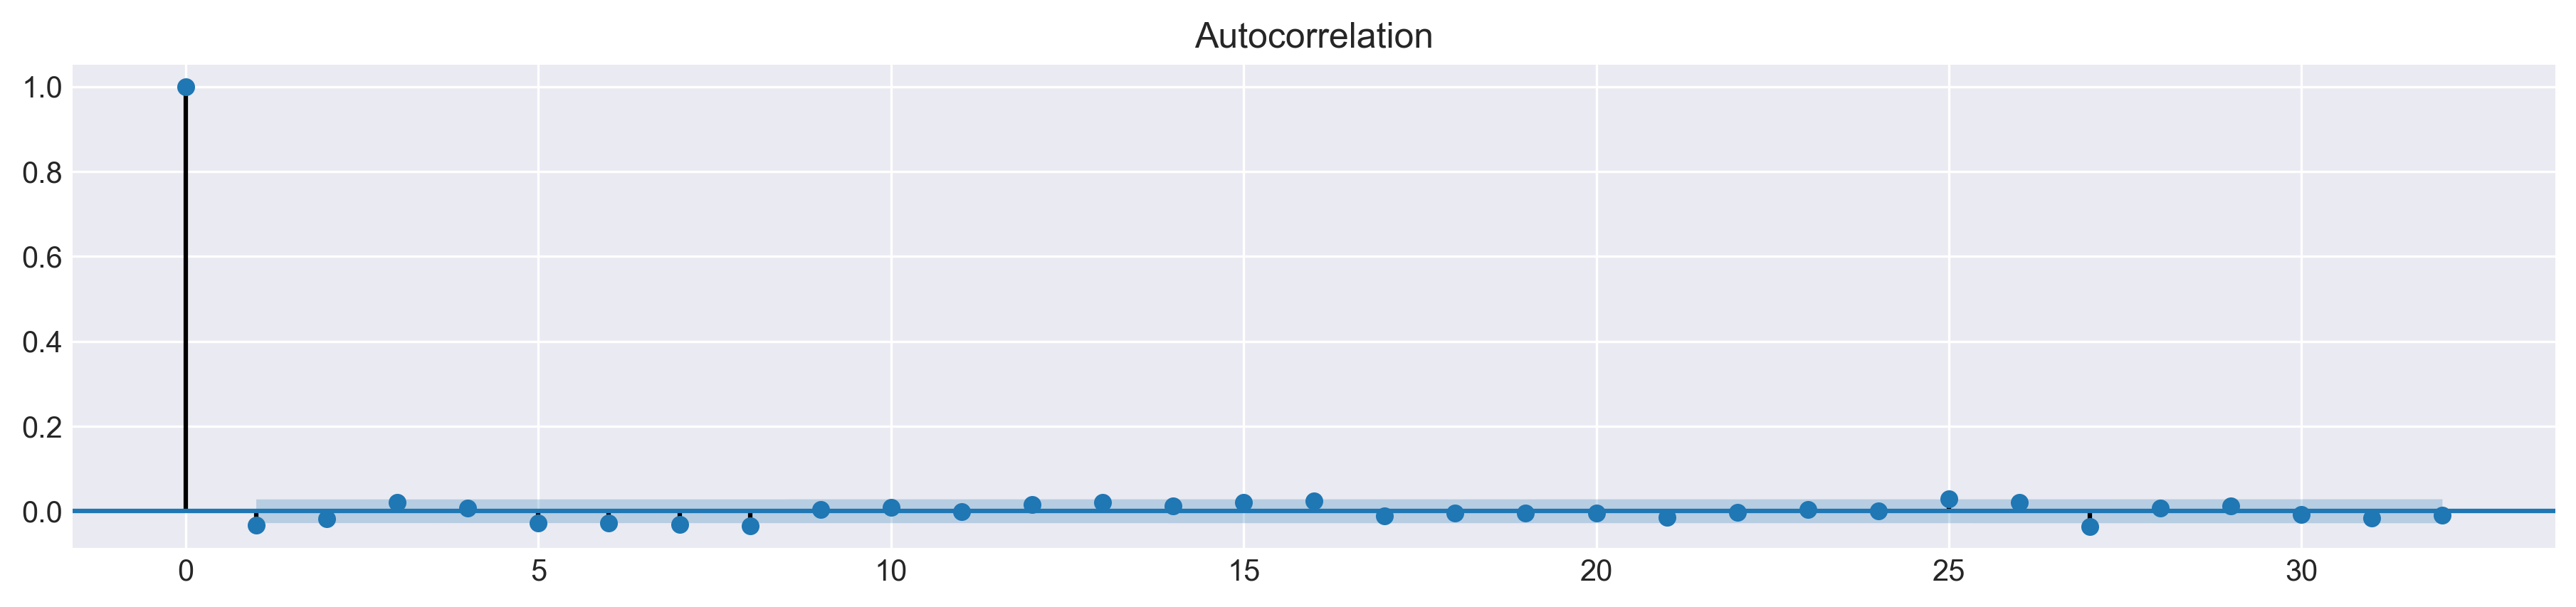

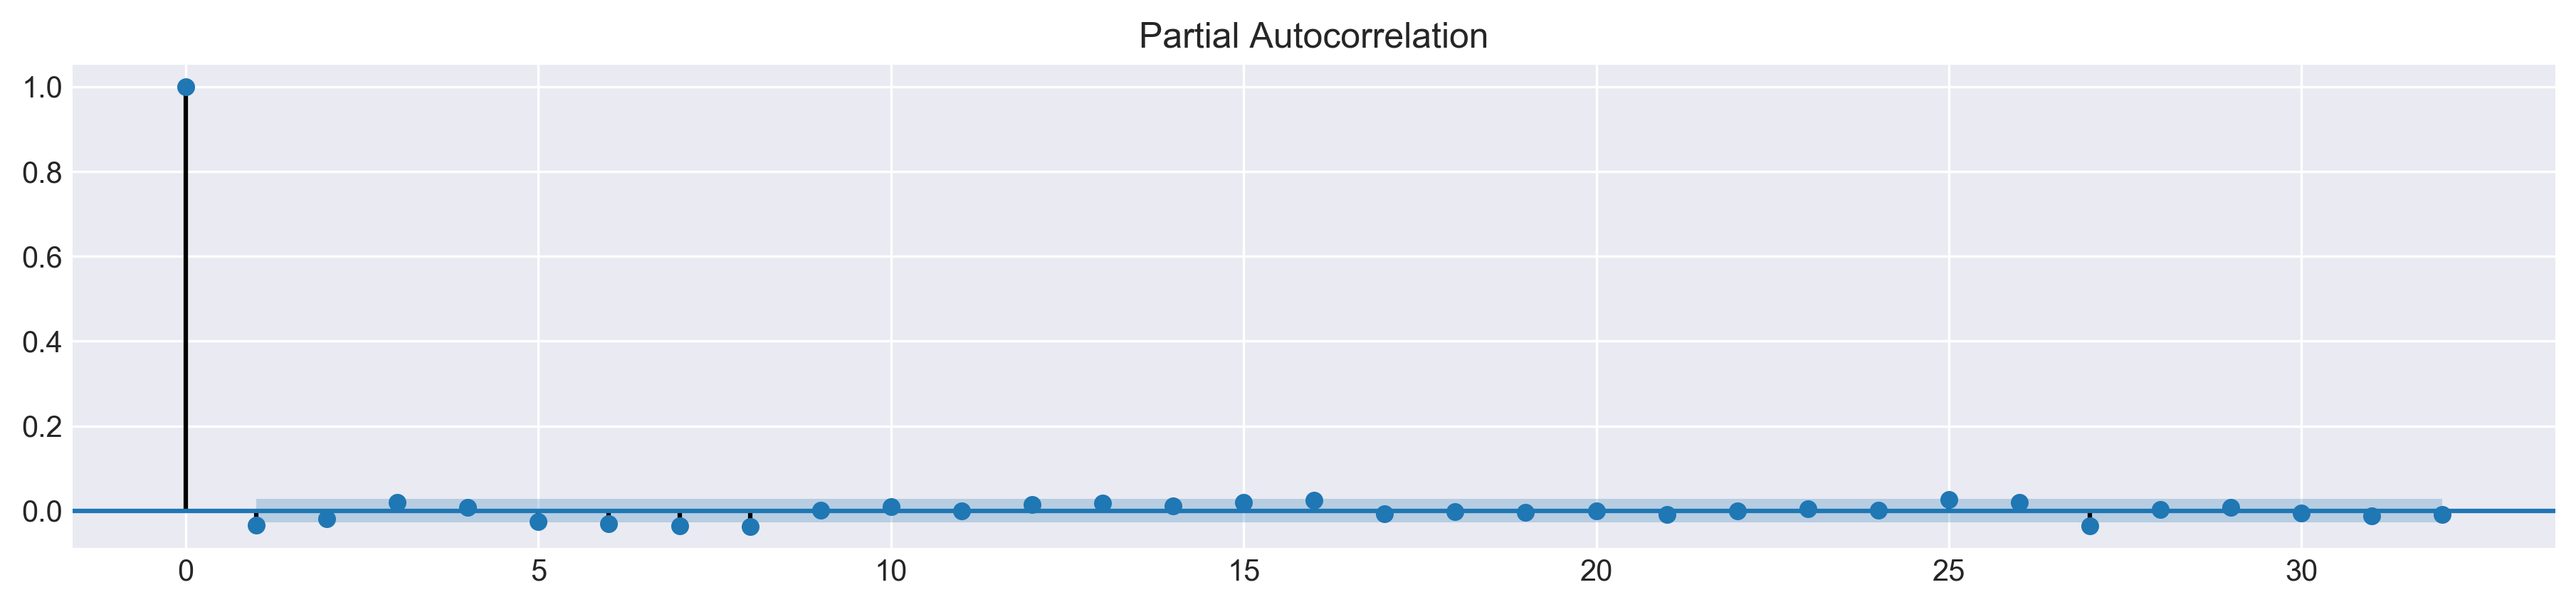

In [217]:
sm.tsa.graphics.plot_acf(df_wti_return.dropna().values, lags=32)
plt.show()
sm.tsa.graphics.plot_pacf(df_wti_return.dropna(), lags=32)
plt.show()